In [77]:
import numpy
import matplotlib.pyplot as plt

### Set default plot parameters

# Font and fontsize
rc = {"font.family" : "serif", 
      "mathtext.fontset" : "stix"}
plt.rcParams.update(rc)
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]
plt.rcParams['font.size'] = 14
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12

# Grid
plt.rcParams['grid.linestyle'] = '--'
plt.rcParams['grid.linewidth'] = 0.5
plt.rcParams['grid.color'] = 'white'
plt.rcParams['axes.grid'] = True

# Background color
plt.rcParams['axes.facecolor'] = 'lightgrey'



# K means clustering

Clustering is used for classification. Here we are going to work with simulated data. We are going to simulate a set of people; children, women and men. We will assume that children are small, in height and weight, women slightly larger and men larger again. We will simulate data with 20% children, 45% women and 35% men. We will assume that weight is correlated to height.

Note how the following code does not use any imported algorithms. You may of course do so, and also change the number of clusters.

---

* Author: Troels C. Petersen (NBI) & Brian Vinter (former NBI, now AU)
* Email:  petersen@nbi.dk
* Date:   25th of April 2025 (latest version)

In [78]:
# Produce/simulate the data:

children, women, men = 20, 45, 35
sample = children + women + men

height_children = numpy.random.normal(120, 15, children) / 100
weight_children = 21.5 * height_children * numpy.random.normal(1.0, 0.05, children)

height_women = numpy.random.normal(170, 5, women) / 100
weight_women = 40.0 * height_women * numpy.random.normal(1.0, 0.1, women)

height_men = numpy.random.normal(180, 5, men) / 100
weight_men = 50.0 * height_men * numpy.random.normal(1.0, 0.1, men)

Lets plot the data so that we may compare to our later results in classifying our data.

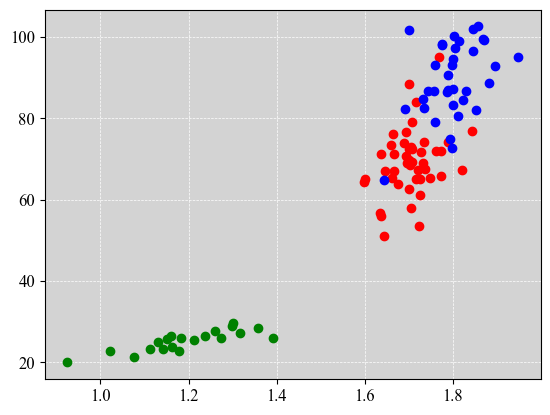

In [79]:
plt.plot(height_children, weight_children, 'go')
plt.plot(height_women, weight_women, 'ro')
plt.plot(height_men, weight_men, 'bo')
plt.show()

Now we place all data into one large array. Thereby we loose all knowledge og categories, though we still know from the order of the points, we can use that fact later for testing. We move on to normalize the data for use in the distance function. 

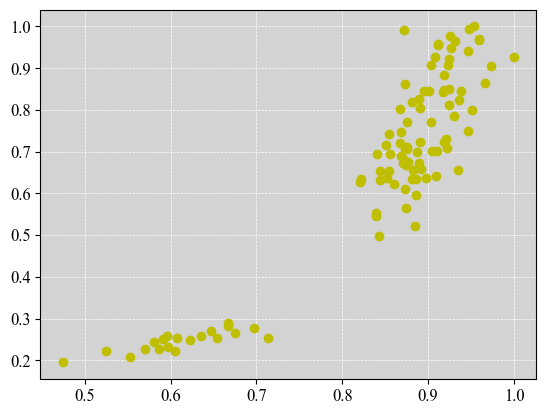

In [80]:
raw_data = numpy.concatenate((numpy.array((height_children, weight_children)), \
                              numpy.array((height_women, weight_women)) , \
                              numpy.array((height_men, weight_men))), axis = 1)

# We normalize and transpose to have the data in rows
data = raw_data / numpy.max(raw_data, axis = 1)[numpy.newaxis].T 
plt.plot(data[0, :], data[1, :], 'yo')
plt.show()

Now we can start trying to find the clusters. We start out by picking 3 random points and build clusters around those. This will often look good, even though we are only building random clusters.

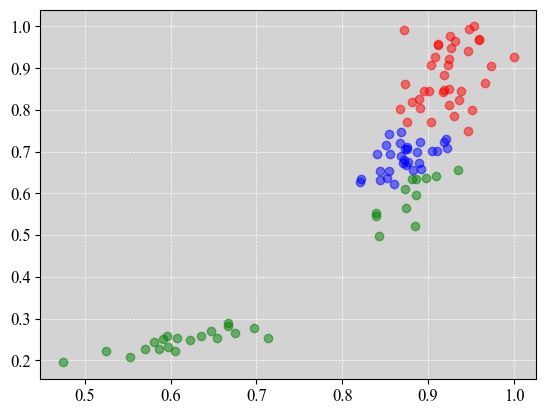

In [81]:
def all_dist(observation, data):
    return numpy.sqrt((data[0, :] - observation[0])**2 + (data[1, :] - observation[1])**2)

k=3
centroids = numpy.array([data[:, numpy.random.randint(sample)] for _ in range(k)])
distances = numpy.empty((k,sample))
for d in range(k):
    distances[d, :] = all_dist(centroids[d], data)
winners = numpy.argmin(distances, axis = 0)

clusters = [data[:, winners == i] for i in range(k)]
for cluster, color in zip(clusters, ['go', 'ro', 'bo']):
    plt.plot(cluster[0, :], cluster[1, :], color, alpha=0.5)
plt.show()

Obviously we need to iterate to make the clusters better. We do this by recalculating the center of a cluster to be the mean of the points inside the cluster for each itteration. Once the cluster centers do not change we have converged.

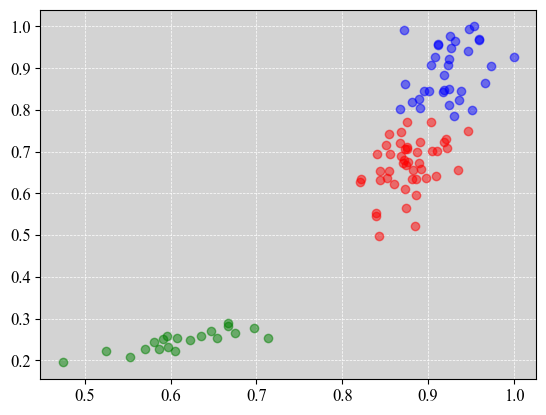

In [85]:
def cluster(data, k):
    sample = data.shape[1]
    centroids = numpy.array([data[:, numpy.random.randint(sample)] for _ in range(k)])
    done = False
    while not done:
        distances = numpy.empty((k,sample))
        for d in range(k):
            distances[d, :] = all_dist(centroids[d], data)
        winners = numpy.argmin(distances, axis = 0)
        clusters = [data[:, winners == i] for i in range(k)]
        prev_centroids = centroids
        centroids = numpy.array([numpy.average(cluster, axis = 1) for cluster in clusters])
        if numpy.sum(prev_centroids-centroids) == 0:
            done=True
    return clusters

clusters = cluster(data,3)
for clust, color in zip(clusters, ['go', 'ro', 'bo']):
    plt.plot(clust[0, :], clust[1, :], color, alpha=0.5)
plt.show()



# Excersises:
1. Increase the sample size and see how that affects the algorithm.
2. Try and add on obvious outlier; a 1m 100kg person for instance, and see what happens.
3. Try other (imported) algorithms on this data sample, possibly also changing its parameters and size.

# Learning points:
0. Clustering needs normalisation of variables to begin with.
1. Clustering is not easy and does not always yield a great result.
2. Different methods work on different datasets - it is not clear from the data which algorithm to use.
3. Visualisation (whenever possible) is important.
4. Evaluating the performance and (sub)selecting variables is not easy.
5. The "elbow method" can be used for determining the number of clusters.

___

## Increasing sample size



Text(0, 0.5, 'Normalized Weight')

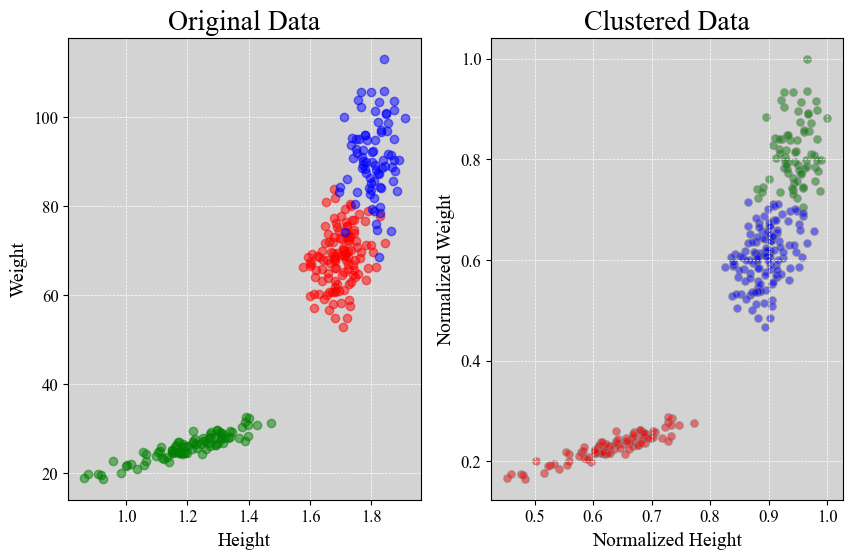

In [86]:
children, women, men = 90, 120, 80
sample = children + women + men

height_children = numpy.random.normal(120, 15, children) / 100
weight_children = 21.5 * height_children * numpy.random.normal(1.0, 0.05, children)

height_women = numpy.random.normal(170, 5, women) / 100
weight_women = 40.0 * height_women * numpy.random.normal(1.0, 0.1, women)

height_men = numpy.random.normal(180, 5, men) / 100
weight_men = 50.0 * height_men * numpy.random.normal(1.0, 0.1, men)

inc_data = numpy.concatenate((numpy.array((height_children, weight_children)),
                              numpy.array((height_women, weight_women)),
                              numpy.array((height_men, weight_men))), axis = 1)

norm_factor = numpy.max(inc_data, axis = 1)[numpy.newaxis].T
norm_inc_data = inc_data / norm_factor

clustered = cluster(norm_inc_data, 3)


# Plot
fig, ax = plt.subplots(1,2, figsize=(10, 6))
#ax[0].scatter(norm_inc_data[0, :], norm_inc_data[1, :], alpha=0.5, s=30, color='orange', edgecolor='grey')
ax[0].plot(height_children, weight_children, 'go', alpha=0.5)
ax[0].plot(height_women, weight_women, 'ro', alpha=0.5)
ax[0].plot(height_men, weight_men, 'bo', alpha=0.5)
ax[0].set_title('Original Data')
ax[0].set_xlabel('Height')
ax[0].set_ylabel('Weight')


for clust, color in zip(clustered, ['g', 'r', 'b']):
    ax[1].scatter(clust[0, :], clust[1, :], alpha=0.5, s=30, c=color, edgecolor='grey')
ax[1].set_title('Clustered Data')
ax[1].set_xlabel('Normalized Height')
ax[1].set_ylabel('Normalized Weight')


## Adding some outliers


Text(0, 0.5, 'Normalized Weight')

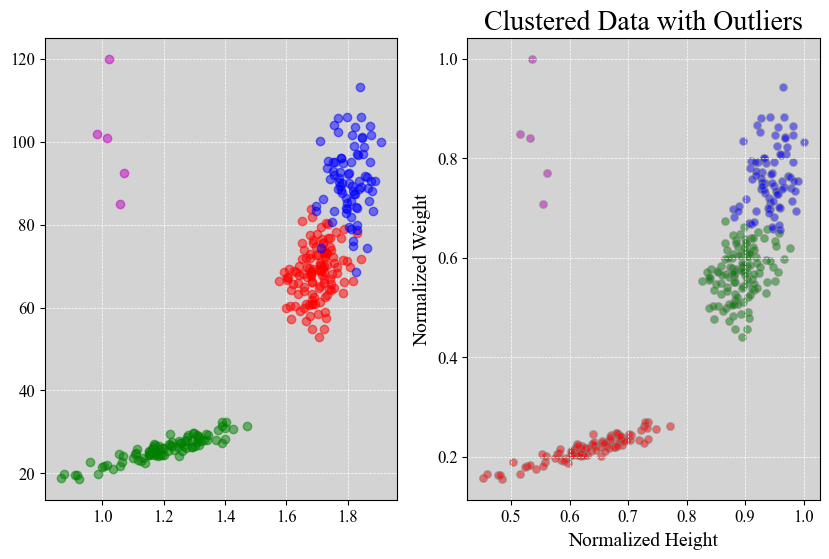

In [93]:
height_outliers = numpy.random.normal(100, 5, 5) / 100
weight_outliers = 100 * height_outliers * numpy.random.normal(1.0, 0.1, 5)
out_data = numpy.concatenate((inc_data, numpy.array((height_outliers, weight_outliers))), axis = 1)

norm_factor = numpy.max(out_data, axis = 1)[numpy.newaxis].T
norm_out_data = out_data / norm_factor
clustered_out = cluster(norm_out_data, 4)


fig, ax = plt.subplots(1,2, figsize=(10, 6))
ax[0].plot(height_children, weight_children, 'go', alpha=0.5)
ax[0].plot(height_women, weight_women, 'ro', alpha=0.5)
ax[0].plot(height_men, weight_men, 'bo', alpha=0.5)
ax[0].plot(height_outliers, weight_outliers, 'mo', alpha=0.5)


for clust, color in zip(clustered_out, ['g', 'r', 'b', 'm']):
    ax[1].scatter(clust[0, :], clust[1, :], alpha=0.5, s=30, c=color, edgecolor='grey')
ax[1].set_title('Clustered Data with Outliers')
ax[1].set_xlabel('Normalized Height')
ax[1].set_ylabel('Normalized Weight')

